In [2]:
import os
os.chdir("..")
print(os.getcwd())

/home/womogenes/school/ap115_final/final_project


In [3]:
import numpy as np
import pickle
import json

import osmnx as ox

from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import colormaps as cmaps
from matplotlib import colors
from matplotlib import cm

from data import get_data
from random_walks import get_end_nodes
from utils import float2color

In [4]:
with open("./places.json") as fin:
    places = json.load(fin)

placename, coords, slug = places[0]
slug = "harvard"

G, adj, boba_gdf = get_data(slug)

In [5]:
print(f"Graph has {len(G.nodes()):,} nodes and {len(G.edges()):,} edges.")

Graph has 27,191 nodes and 77,299 edges.


In [6]:
with open(f"./data/shortest_paths/{slug}.pkl", "rb") as fin:
    costs = pickle.load(fin)

In [7]:
max_cost = max(costs.values()) * 0.5
node_colors=cmaps["inferno_r"]([
    (costs[node] / max_cost) \
    for node in tqdm(G.nodes())
])

100%|██████████| 27191/27191 [00:00<00:00, 453320.67it/s]


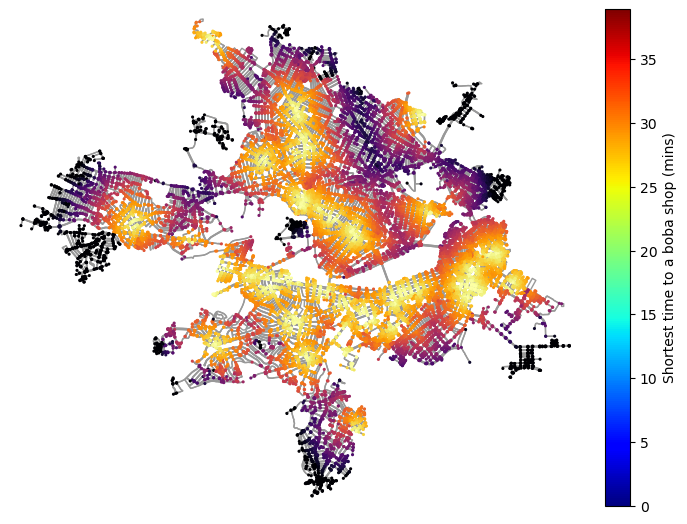

In [8]:
fig, ax = ox.plot_graph(G, bgcolor="#fff", node_color=node_colors, edge_linewidth=1, node_size=5, show=False);

norm = plt.Normalize(vmin=0, vmax=max(costs.values()) * 0.5)
cb = fig.colorbar(cm.ScalarMappable(norm=norm, cmap="jet"), ax=ax, orientation="vertical", fraction=0.04, pad=0.04)
cb.set_label("Shortest time to a boba shop (mins)")
plt.show()

In [9]:
cost_arr = np.array(list(costs.values()))
print(f"Mean time to boba shop:   {cost_arr.mean():>6.3f} mins")
print(f"Median time to boba shop: {np.median(cost_arr):>6.3f} mins")

Mean time to boba shop:   16.291 mins
Median time to boba shop: 13.656 mins


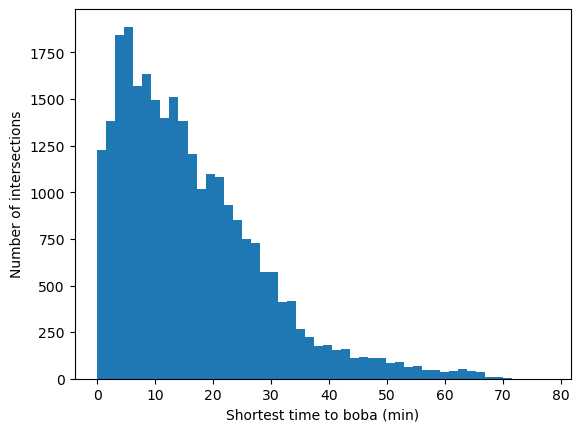

In [10]:
plt.xlabel("Shortest time to boba (min)")
plt.ylabel("Number of intersections")
plt.hist(cost_arr, bins=50);